# Forcasting Using FbProphet

In [1]:
!pip install pystan
!pip install fbprophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running set

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from prophet import Prophet
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import performance_metrics, cross_validation

In [5]:
df=pd.read_csv('airline_passengers.csv')

In [6]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [7]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


<Axes: >

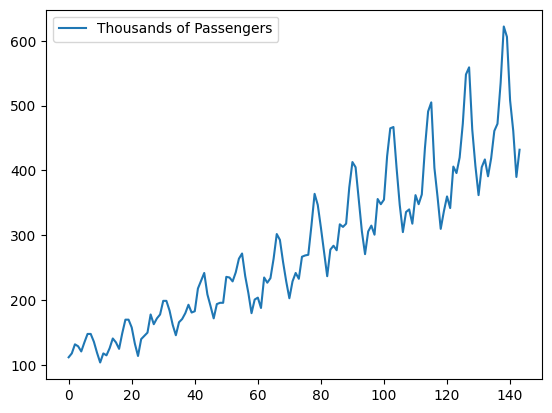

In [8]:
df.plot()

In [9]:
df.columns=['ds','y']
df.head()

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [10]:
df.drop(144, axis=0, inplace=True)

In [11]:
df.tail()

,ds,y
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [12]:
df['ds']=pd.to_datetime(df['ds'])

In [13]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [15]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'calculate_initial_params',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot

In [16]:
# Initializing the model
model=Prophet()

In [17]:
df.columns

Index(['ds', 'y'], dtype='object')

In [19]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [20]:
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0w9emzdh/vy82e352.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0w9emzdh/tkmqlrsz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96305', 'data', 'file=/tmp/tmp0w9emzdh/vy82e352.json', 'init=/tmp/tmp0w9emzdh/tkmqlrsz.json', 'output', 'file=/tmp/tmp0w9emzdh/prophet_model294jsqoz/prophet_model-20240816055657.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:56:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:56:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [23]:
# create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [26]:
future_dates.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [24]:
prediction=model.predict(future_dates)

In [25]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.406338,57.815335,114.428300,107.406338,107.406338,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,0.0,0.0,0.0,86.018883
1,1949-02-01,109.550561,50.804904,106.852626,109.550561,109.550561,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,0.0,0.0,0.0,79.495226
2,1949-03-01,111.487279,80.975292,138.760220,111.487279,111.487279,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,0.0,0.0,0.0,111.025581
3,1949-04-01,113.631502,81.265341,137.846604,113.631502,113.631502,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,0.0,0.0,0.0,108.719017
4,1949-05-01,115.706556,80.376655,141.370671,115.706556,115.706556,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,0.0,0.0,0.0,112.095281


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


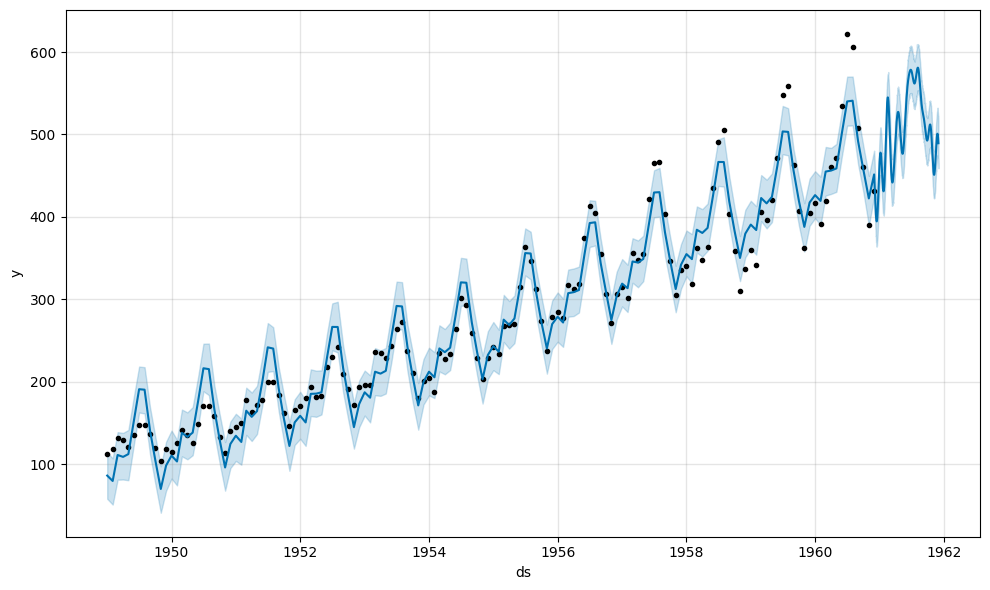

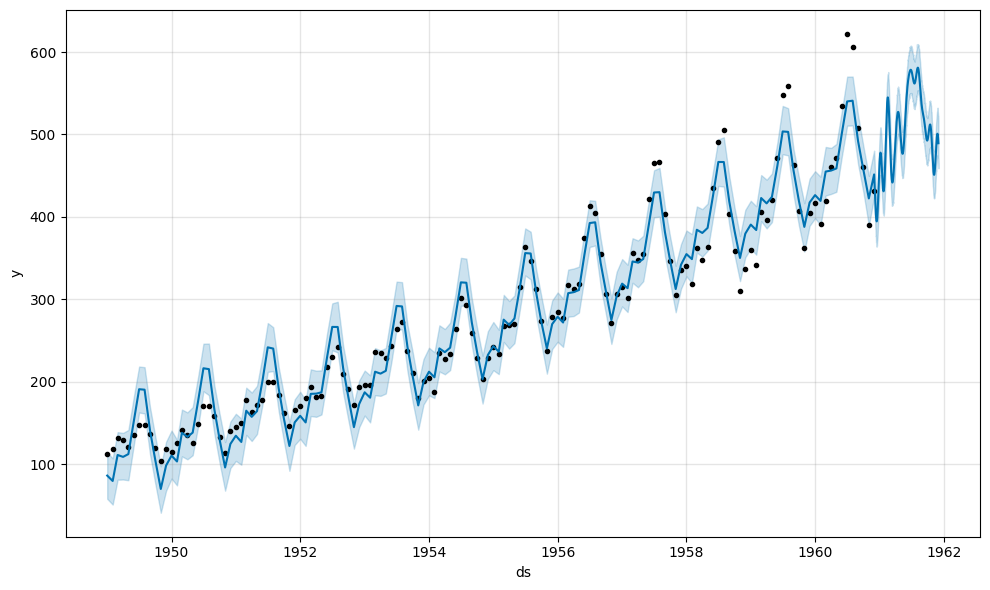

In [29]:
# plot the predicted projection
model.plot(prediction)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

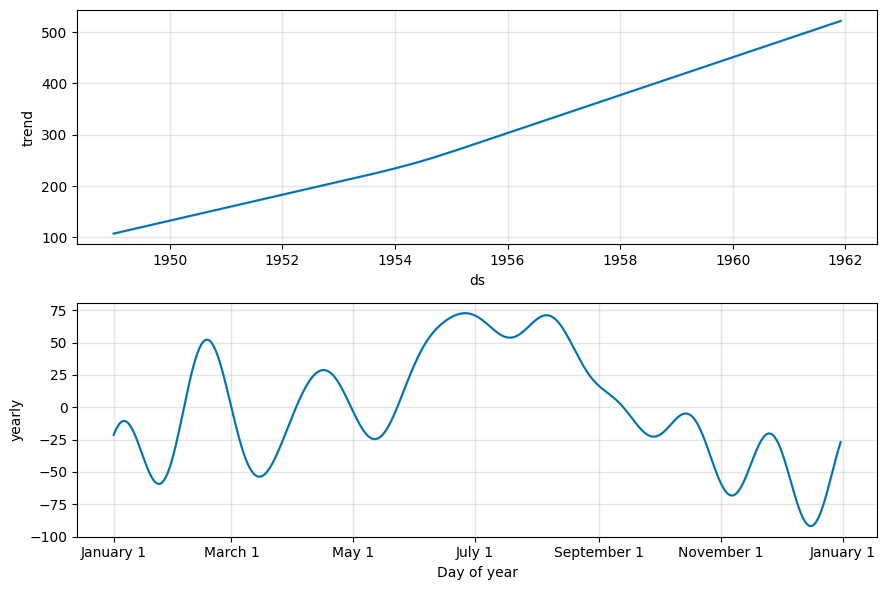

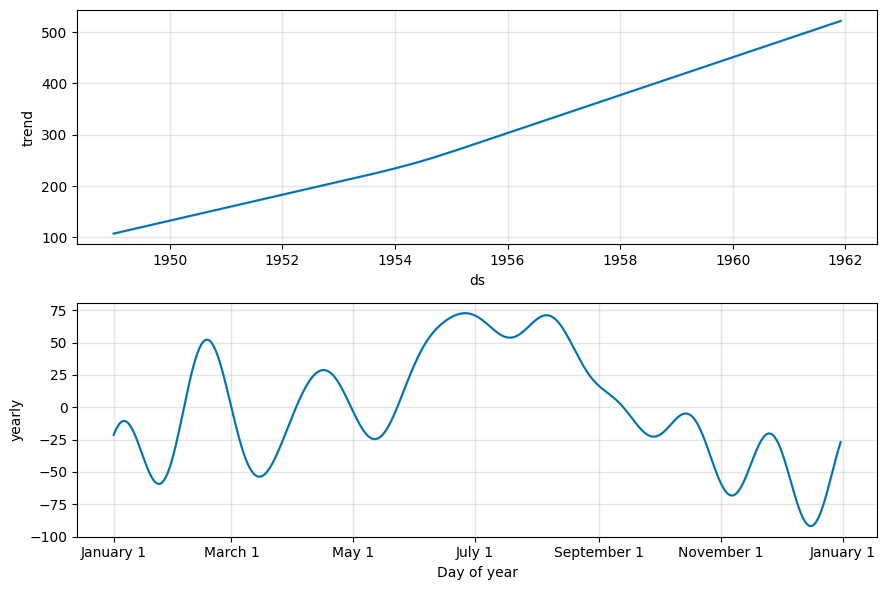

In [30]:
# Visualize Each Components[Trends,Weakly]
model.plot_components(prediction)

In [ ]:
# Time Series Analysis

# 1960-1962
# Cross validation
# 1960-1961 ------Train data
# 1961-1962 ------Test data
# 1962-1963 ------Validation data


In [32]:
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:prophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00


  0%|          | 0/19 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0w9emzdh/gsu7xiq8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0w9emzdh/p6tw0fl_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4737', 'data', 'file=/tmp/tmp0w9emzdh/gsu7xiq8.json', 'init=/tmp/tmp0w9emzdh/p6tw0fl_.json', 'output', 'file=/tmp/tmp0w9emzdh/prophet_model6nw2a10v/prophet_model-20240816061505.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:15:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:15:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0w9emzdh/rne5ojxw.json
DEBUG:cmdstanpy:input tempfil

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,158.547043,158.339999,158.803894,150.0,1951-01-18
1,1951-03-01,171.930554,171.235626,172.719675,178.0,1951-01-18
2,1951-04-01,160.294061,158.862401,161.922708,163.0,1951-01-18
3,1951-05-01,146.088671,143.787370,148.584489,172.0,1951-01-18
4,1951-06-01,181.775393,178.480452,185.225554,178.0,1951-01-18


In [33]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,40 days,1089.760435,33.011520,25.888183,0.078584,0.073832,0.079624,0.227273
1,42 days,1015.074527,31.860234,25.207161,0.076726,0.073832,0.077409,0.181818
2,46 days,909.815509,30.163148,24.622042,0.078579,0.078888,0.078319,0.136364
3,47 days,1044.416363,32.317431,26.737368,0.081351,0.085408,0.081498,0.136364
4,48 days,1034.025454,32.156266,26.194461,0.079480,0.085408,0.079693,0.181818


In [34]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,40 days,1089.760435,33.011520,25.888183,0.078584,0.073832,0.079624,0.227273
1,42 days,1015.074527,31.860234,25.207161,0.076726,0.073832,0.077409,0.181818
2,46 days,909.815509,30.163148,24.622042,0.078579,0.078888,0.078319,0.136364
3,47 days,1044.416363,32.317431,26.737368,0.081351,0.085408,0.081498,0.136364
4,48 days,1034.025454,32.156266,26.194461,0.079480,0.085408,0.079693,0.181818


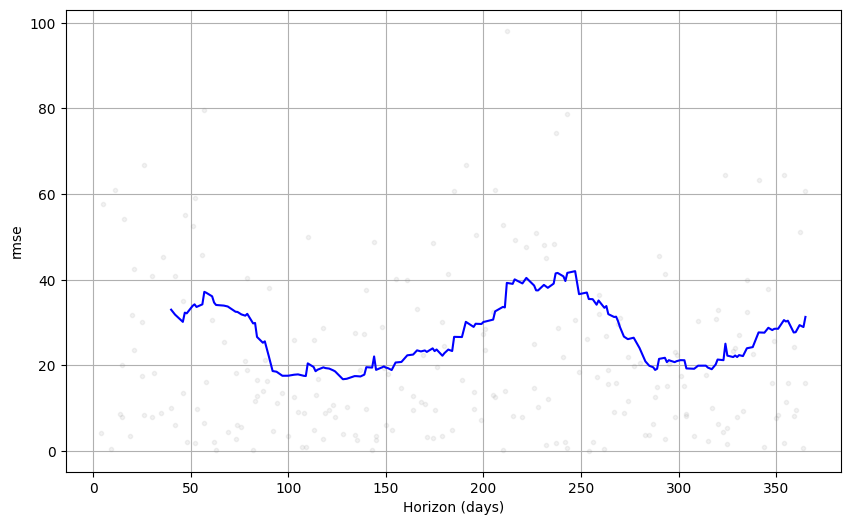

In [35]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')